Hello, This notebook contains IGBO corpus runner, Stopwords, and Sentiment Analysis. You will need to run each cell to generate Corpus and get results for some code examples.

The IGBO corpus files will be visible on the left hand side under the folder Menu. All the textual files are stored here: https://github.com/Stan-Atajan-Cyberteam-NSF/Igbo_Corpora .

<b>Make sure to upload here file: English_TextBlob_sentiments (1).csv found in github for Sentiment part of the code.</b>

In [33]:
#Run to load necessary libraries
import nltk
from nltk.text import Text

nltk.download('stopwords')
nltk.download('punkt')
nltk.download('gutenberg')
from nltk import ngrams
import matplotlib.pyplot as plt
from nltk.collocations import BigramAssocMeasures, BigramCollocationFinder
from wordcloud import WordCloud
from collections import Counter
from nltk import FreqDist
import pandas as pd

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package gutenberg to /root/nltk_data...
[nltk_data]   Package gutenberg is already up-to-date!


#Creating IGBO CORPUS

In [34]:
#@title Corpus Creator
import urllib.request
import nltk
import os
from nltk.corpus.reader.plaintext import PlaintextCorpusReader
import requests

# create a new corpus directory Igbo
corpus_root = '/content/Igbo'
nltk.data.path.append(corpus_root)

#our main subfolders under Igbo folder
general_genres = ['folklore_stories', 'government', 'news','bible_books'] #changing from bbc_news to news

# create subdirectories for each genre
for genre in general_genres:
    genre_path = os.path.join(corpus_root, genre)
    if not os.path.exists(genre_path):
        os.makedirs(genre_path)



# text files that contain urls of corpora urls
bible_books_urls = "https://raw.githubusercontent.com/Stan-Atajan-Cyberteam-NSF/Igbo_Corpora/main/Corpus/Bible_books.txt"
folklore_stories_urls = "https://raw.githubusercontent.com/Stan-Atajan-Cyberteam-NSF/Igbo_Corpora/main/Corpus/folklore_stories.txt"
government_urls = 'https://raw.githubusercontent.com/Stan-Atajan-Cyberteam-NSF/Igbo_Corpora/main/Corpus/govt_docs.txt'
bbc_news_urls = 'https://raw.githubusercontent.com/Stan-Atajan-Cyberteam-NSF/Igbo_Corpora/main/Corpus/bbc_links.txt'


#get bible books urls
response = requests.get(bible_books_urls)
url_list = response.content.decode().split("\n")
bible_books_urls2 = [url.replace('\r', '') for url in url_list]
#get folklore stories' urls
response = requests.get(folklore_stories_urls)
url_list = response.content.decode().split("\n")
folklore_stories_urls2 = [url.replace('\r', '') for url in url_list]
#get government files urls
response = requests.get(government_urls)
url_list = response.content.decode().split("\n")
government_urls2 = [url.replace('\r', '') for url in url_list]
#get bbc news urls
response = requests.get(bbc_news_urls)
url_list = response.content.decode().split("\n")
bbc_news_urls2 = [url.replace('\r', '') for url in url_list]


#get copy text and create a txt file from urls
def corpora_creator(corpora_urls,genre): #corpora urls is urls for each corpora, genre is which subcorpus to put files in
  for i, url in enumerate(corpora_urls):
      # get the filename from the url after the 7th / character
      filename = url.split('/')[-1]
      # remove the file extension from the filename
      filename = os.path.splitext(filename)[0]
      # get the first alpha word from the filename
      filename = f'{"".join(filter(str.isalpha, corpora_urls[i].split("/")[-1].split(".")[0]))}'
 #filename = ''.join(filter(str.isalpha, filename))
      with urllib.request.urlopen(url) as response:
          text = response.read().decode().split('\n')
          with open(os.path.join(corpus_root, genre, f'{filename}.txt'), 'w') as file:
              file.write('\n'.join(text))
# Remove empty strings from bbc_news_urls2
bbc_news_urls2 = [url for url in bbc_news_urls2 if url.strip()]

#apply function above
corpora_creator(folklore_stories_urls2,general_genres[0]) #to put in folklore stores
corpora_creator(bbc_news_urls2, general_genres[2]) #to put in the bbc news
corpora_creator(bible_books_urls2, general_genres[3]) #to put in the bible books
corpora_creator(government_urls2, general_genres[1]) #to put in the government

## Converting to Corpus file and printing existing corporas

In [35]:
from nltk.corpus.reader.plaintext import CategorizedPlaintextCorpusReader
#create the root folder
corpus_root = '/content/Igbo'

# create a CategorizedPlaintextCorpusReader
IGBO = CategorizedPlaintextCorpusReader(corpus_root, r'.*\.txt', cat_pattern=r'([\w_]+)/.*')
#to count sentences
tokenizer = nltk.data.load('tokenizers/punkt/english.pickle')
#to store each genres words and sentences
df = pd.DataFrame(columns=['genre', 'num_words', 'num_sentences'])

# print fileids and genres
for genre in IGBO.categories():
    print(f"\n{genre}:\n{IGBO.fileids(categories=genre)}")

#store number of words and sentences for each genre
for genre in IGBO.categories():

    # Get the list of files for this genre

    fileids = IGBO.fileids(categories=genre)

    # Initialize counters for this genre
    num_words = 0
    num_sentences = 0

    # Loop over the files for this genre
    for fileid in fileids:
        # Load the file content
        content = IGBO.raw(fileids=[fileid])

        # Tokenize the sentences and count them
        sentences = tokenizer.tokenize(content)
        num_sentences += len(sentences)

        # Tokenize the words and count them
        words = nltk.word_tokenize(content)
        num_words += len(words)

    #dataframe to build
    data_to_append = {'genre': genre, 'num_words': num_words, 'num_sentences': num_sentences}
    # Store the results for this genre in the dataframe

    df = pd.concat([df, pd.DataFrame(data_to_append, index=[0])], ignore_index=True)

    #df = df.append({'genre': genre, 'num_words': num_words, 'num_sentences': num_sentences}, ignore_index=True)

# Print the dataframe
#print(df)



bible_books:
['bible_books/BookofAbuakwa.txt', 'bible_books/BookofAbunkeabu.txt', 'bible_books/BookofAbuoma.txt', 'bible_books/BookofAisaia.txt', 'bible_books/BookofDaniel.txt', 'bible_books/BookofDeuteronomi.txt', 'bible_books/BookofEklisiastis.txt', 'bible_books/BookofEmos.txt', 'bible_books/BookofEsta.txt', 'bible_books/BookofEzikiel.txt', 'bible_books/BookofEzra.txt', 'bible_books/BookofFailimon.txt', 'bible_books/BookofHabakuk.txt', 'bible_books/BookofHagai.txt', 'bible_books/BookofHosea.txt', 'bible_books/BookofIlu.txt', 'bible_books/BookofJemes.txt', 'bible_books/BookofJenesis.txt', 'bible_books/BookofJeremaia.txt', 'bible_books/BookofJob.txt', 'bible_books/BookofJoel.txt', 'bible_books/BookofJon.txt', 'bible_books/BookofJona.txt', 'bible_books/BookofJoshua.txt', 'bible_books/BookofJud.txt', 'bible_books/BookofLevitikos.txt', 'bible_books/BookofLuk.txt', 'bible_books/BookofMaika.txt', 'bible_books/BookofMaitu.txt', 'bible_books/BookofMak.txt', 'bible_books/BookofMalakai.txt', '

### Examples to run

In [36]:
nltk.download('punkt')
#print sentences of a choice of choice of corpus
print(IGBO.sents('news/akuko.txt'))


[['Ndị', 'na', '-', 'ere', 'ngwa', 'nri', 'akwaala', 'arịrị', 'njọahịa', 'na', '-', 'eme', 'n', "'", 'ihi', 'ụkọ', 'ego', 'ọhụrụ', 'dị', 'na', 'Naịjirịa', 'ugbua', '.'], ['Esemokwu', 'na', 'ịgba', 'akwụkwọ', 'ka', 'na', '-', 'arị', 'ibe', 'ya', 'elu', 'dịka', 'a', 'na', '-', 'akwado', 'ịzọ', 'ọkwa', 'Gọvanọ', 'na', 'ntuliaka', 'na', '-', 'abịa', '.'], ...]


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [37]:
#@title sample how to pick a corpus to load
corpus = "Igbo/government/NigeriaConstitutiongoogletranslate.txt" # replace with your own corpus file name
with open(corpus, 'r', encoding='utf-8') as f:
    text = f.read()

In [38]:
#@title print sentences of UniversalDeclarationofHumanRightsigbo corpus
#print(IGBO.sents('Igbo/government/NigeriaConstitutiongoogletranslate.txt'))
print(IGBO.sents('government/UniversalDeclarationofHumanRightsigbo.txt'))
corpus = "Igbo/government/UniversalDeclarationofHumanRightsigbo.txt" # replace with your own corpus file name
with open(corpus, 'r', encoding='utf-8') as f:
    text = f.read()

[['NKUWUWAPU', '̝', 'TA', 'U', '̝', 'WA', 'NILE', 'BANYERE', 'IKIKE', 'MMADU', '̝', 'NWEGASI', '̝', 'RI', '̝', 'Okwu', 'mmalite', 'Ebe', 'o', '̝', 'bu', '̝', 'na', 'ngho', '̝', 'ta', 'ugwu', 'ekere', 'uwa', 'na', 'ikike', 'nha', 'anya', 'a', 'pu', '̟', 'ghi', '̟', 'i', '̟', 'napu', '̟', 'mmadu', '̟', 'nke', 'diri', '̟', 'onye', 'o', '̟', 'bu', '̟', 'la', 'bi', 'n', "'", 'u', '̟', 'wa', 'bu', '̟', 'ntu', '̟', 'ala', 'nke', 'inwere', 'onwe', ',', 'ikpe', 'nkwu', '̟', 'mo', '̟', 'to', '̟', 'na', 'udo', 'n', "'", 'elu', '̟', 'u', '̟', 'wa', '.'], ['Ebe', 'nleghara', 'anya', 'na', 'nleli', 'ikike', 'mmadu', 'nwegas', '̟', 'iri', '̟', 'emeela', 'ka', 'e', 'nwee', 'akparamagwa', 'enweghi', 'uche', 'nke', 'gbawara', 'obi', 'mmadu', '̟', 'nile', ',', 'a', 'bi', '̟', 'akwa', 'o', '̟', 'bi', '̟', 'bi', '̟', 'a', 'u', '̟', 'wa', 'ebe', 'ndi', 'mmadu', '̟', 'ga', '-', 'enwejupu', '̟', 'ta', 'ohere', 'ikwu', 'okwu', 'na', 'inwe', 'nkwenye', 'nakwa', 'nlihapu', '̟', 'n', "'", 'u', '̟', 'jo', '̟', 'na

In [39]:
#@title get stopwords of english and export to csv file
import nltk
import csv
stopwords = nltk.corpus.stopwords.words('english')
with open('stopwords.csv', 'w', encoding='utf-8') as f:
    writer = csv.writer(f)
    for word in stopwords:
        writer.writerow([word])

In [40]:
#@title read stopwords
igbo_stopwords = pd.read_csv('stopwords.csv', encoding='UTF-8')
igbo_stopwords.head()
#type(text)

,i
0,me
1,my
2,myself
3,we
4,our


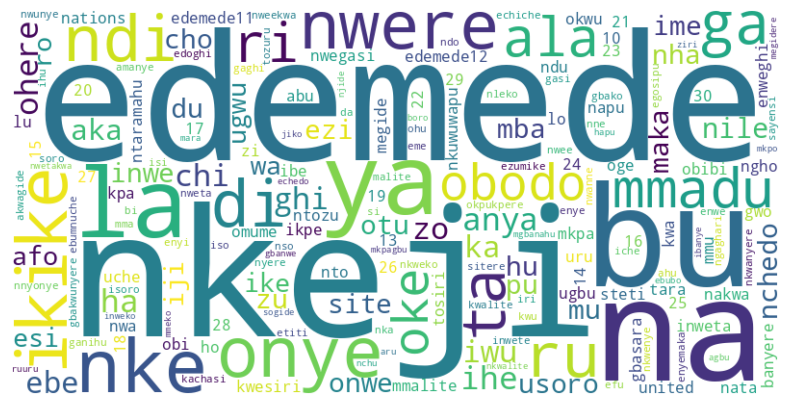

In [41]:
from sklearn.feature_extraction.text import TfidfVectorizer
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Read the text file
file_path = 'Igbo/government/UniversalDeclarationofHumanRightsigbo.txt'  # Replace with the actual path to your text file
with open(file_path, 'r', encoding='utf-8') as file:
    corpus = file.readlines()


# Extract stop words from the DataFrame
stopwords = igbo_stopwords['i'].tolist()

# Convert the corpus to TF-IDF representation, excluding stop words
vectorizer = TfidfVectorizer(stop_words=stopwords)
tfidf_matrix = vectorizer.fit_transform(corpus)

# Get feature names (words)
feature_names = vectorizer.get_feature_names_out()

# Create a dictionary with words and their corresponding TF-IDF scores
word_tfidf_scores = dict(zip(feature_names, tfidf_matrix.sum(axis=0).A1))

# Generate the word cloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(word_tfidf_scores)

# Display the word cloud using matplotlib
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()


# Sentiment Analysis Below

In [42]:
#@title Load English Textblob sentiments
from textblob import TextBlob
from nltk.corpus import words
import pandas as pd

# Download NLTK resources (if not already downloaded)
nltk.download('words')

# Get a list of English words
english_word_list = set(words.words())

# Initialize a list to store word sentiment scores
word_sentiments = []

# ANalyze sentiment for each word using TextBlob
for word in english_word_list:
    blob = TextBlob(word)
    sentiment_score = blob.sentiment.polarity
    if sentiment_score != 0:
        word_sentiments.append((word, sentiment_score))

# Sort the words based on sentiment scores (most positive to most negative)
sorted_word_sentiments = sorted(word_sentiments, key=lambda x: x[1], reverse=True)

# Create a DataFrame for easy tabular representation
df = pd.DataFrame(sorted_word_sentiments, columns=['Word', 'Sentiment Score'])

# Print the top 5000 words and their sentiment scores
top_5000_words = df.head(5000)
print(top_5000_words)


[nltk_data] Downloading package words to /root/nltk_data...
[nltk_data]   Package words is already up-to-date!


             Word  Sentiment Score
0       legendary              1.0
1     impressedly              1.0
2     exquisitely              1.0
3      flawlessly              1.0
4       masterful              1.0
...           ...              ...
1809      awfully             -1.0
1810       insane             -1.0
1811   gruesomely             -1.0
1812       evilly             -1.0
1813   terrifying             -1.0

[1814 rows x 2 columns]


In [43]:
#Exporting English textblob (this is done to translate each word offline in Igbo, we dont use this file here)
top_5000_words.to_csv('English_TextBlob_sentiments.csv')

In [44]:
#@title Add file English_TextBlob_sentiments (1).csv that contains Igbo translations to run commands from here on
data = pd.read_csv('English_TextBlob_sentiments (1).csv')#[['#{'Igbo_Words': ['example word', 'another example', 'more words'], 'Weights': [0.5, 0.8, 0.2]}
data.head()

,Column1,Word,Sentiment Score,Igbo_Word
0,0,marvelous,1.0,magburu onwe ya
1,1,masterfully,1.0,nke ukwu
2,2,awesome,1.0,dị egwu
3,3,awesomely,1.0,di egwu
4,4,best,1.0,kacha mma


In [45]:
#run a sentiment analysis on a sample text
import pandas as pd
from textblob import TextBlob

# Load the sentiment DataFrame from the file
data = pd.read_csv('English_TextBlob_sentiments (1).csv')
df = data[['Sentiment Score', 'Igbo_Word']].copy()

# Function to get sentiment using pre-defined scores
def get_sentiment_analysis(sentence):
    blob = TextBlob(sentence)

    # Get the overall sentiment polarity and subjectivity
    overall_polarity = blob.sentiment.polarity
    overall_subjectivity = blob.sentiment.subjectivity

    # Get sentiment score for each word in the sentence
    words = sentence.split()
    total_score = 0
    for igbo_word in df['Igbo_Word']:
        if any(word in sentence for word in igbo_word.split()):
            score = df.loc[df['Igbo_Word'] == igbo_word, 'Sentiment Score'].values
            if len(score) > 0:
                total_score += score[0]

    # Calculate the average sentiment score
    avg_score = total_score / len(words) if len(words) > 0 else 0

    return overall_polarity, overall_subjectivity, avg_score

# Example Igbo sentence
igbo_sentence = "Ihu igwe adịghị mma n'èzí."

# Apply sentiment analysis to the Igbo sentence
polarity, subjectivity, avg_score = get_sentiment_analysis(igbo_sentence)

# Print the sentiment analysis results
print(f'Overall Sentiment Polarity: {polarity}')
print(f'Overall Sentiment Subjectivity: {subjectivity}')
print(f'Average Sentiment Score: {avg_score}')

# You can also get a general sentiment label
sentiment_label = 'Positive' if avg_score > 0 else 'Negative' if avg_score < 0 else 'Neutral'
print(f'Sentiment Label: {sentiment_label}')


Overall Sentiment Polarity: 0.0
Overall Sentiment Subjectivity: 0.0
Average Sentiment Score: 13.663333333200006
Sentiment Label: Positive


In [46]:
#@title Running English version of a sample Igbo sentence to see results
from textblob import TextBlob

# Example English sentence
english_sentence = "Today is a good day, but I dont like the wind."

# Create a TextBlob object
blob = TextBlob(english_sentence)

# Get the sentiment polarity (-1 to 1) and subjectivity (0 to 1)
sentiment_polarity = blob.sentiment.polarity
sentiment_subjectivity = blob.sentiment.subjectivity

# Print the sentiment analysis results
print(f'Sentiment Polarity: {sentiment_polarity}')
print(f'Sentiment Subjectivity: {sentiment_subjectivity}')

# You can also get a general sentiment label
sentiment_label = 'Positive' if sentiment_polarity > 0 else 'Negative' if sentiment_polarity < 0 else 'Neutral'
print(f'Sentiment Label: {sentiment_label}')


Sentiment Polarity: 0.7
Sentiment Subjectivity: 0.6000000000000001
Sentiment Label: Positive


In [47]:
#@title Let's take Sentiment polarity one step further, using prefixes to check for word after it as prefixes shouldnt be counting as a score.
import pandas as pd
from textblob import TextBlob

# Load the sentiment DataFrame from the file
data = pd.read_csv('English_TextBlob_sentiments (1).csv')
df = data[['Sentiment Score', 'Igbo_Word']].copy()

# List of prefixes to check for the second word
prefixes_to_check = ['adịghị', 'aka', 'agba', 'afọ', 'agụụ', 'aha', 'ahụ', 'aka', 'amaghị', 'bara', 'dị',
                     'emeghi', 'enweghị', 'gbara', 'ịdị', 'ịda', 'ihe', 'ike', 'ikpe', 'ime', 'ji', 'kacha',
                     'kwesịrị', "n'enweghị", 'na-adọrọ', 'na-anụ', 'obi', 'na-enye', 'na-akpali', "n'ụzọ", 'tọrọ',
                     'oke', "n'ụzọ", 'onye', 'nke', 'oké', 'na-enweghị', 'na-agwụ', 'na-egbu', 'na-eti', 'na-egbu',
                     'na-agwụ', 'nwere', 'na-adịghị', 'na-eti', 'okwu', 'ọbara', 'oke egwu', 'jiri', 'nwere', 'obi',
                     'oke', 'onye', 'na-ama']

# Additional prefix to check
additional_prefix = 'na-ama'

# Sample Igbo sentence
igbo_sentence = "Ụnyaahụ, nwata nwoke ahụ ji ịdị uchu na-eme ihe omume ụlọ ya; Ọ dịghị ka onye umengwụ."
#English: Yesterday, the young boy was diligently doing his homework; he is not like someone lazy.

# Split the sentence into words
words = igbo_sentence.split()

# Function to calculate sentiment of each word
def get_word_sentiment(word):
    matching_entries = df[df['Igbo_Word'].str.match(f'^{word.rstrip(",.")}$', case=False)]

    # Check if matching entries exist
    if not matching_entries.empty:
        # Calculate the sentiment score for the first matching entry
        sentiment_score = matching_entries.iloc[0]['Sentiment Score']
        return sentiment_score
    else:
        return 0


# Function to calculate average sentiment
def get_average_sentiment(sentence):
    total_score = 0
    num_words_with_score = 0

    for i, word in enumerate(words):
        print(f"Word {i + 1}: {word}")

        # Check sentiment of each word
        word_sentiment = get_word_sentiment(word)

        if word_sentiment == 0:
            # If sentiment score is 0, check for prefixes and second word
            for prefix in prefixes_to_check:
                if word.lower().startswith(prefix):
                    # Check the second word in the sentence for sentiment
                    next_word_index = i + 1
                    if next_word_index < len(words):
                        next_word = words[next_word_index]
                        combined_word = f"{word} {next_word}"
                        prefix_entries = df[df['Igbo_Word'].str.startswith(combined_word.rstrip(',.'))]
                        if not prefix_entries.empty:
                            word_sentiment = prefix_entries.iloc[0]['Sentiment Score']
                            print(f'Sentiment Score (Prefix Match): {word_sentiment:.5f}')
                            total_score += word_sentiment
                            num_words_with_score += 1
                            break  # Exit the loop if a match is found
                    else:
                        print("No next word in the sentence.")
                    break  # Exit the loop if a prefix match is found

        else:
            # If sentiment score is not 0, print the sentiment score
            print(f'Sentiment Score: {word_sentiment:.5f}')
            total_score += word_sentiment
            num_words_with_score += 1

    # Calculate average sentiment
    avg_score = total_score / num_words_with_score if num_words_with_score > 0 else 0

    # Print average sentiment
    print(f'Average Sentiment Score: {avg_score:.5f}')

# Call the function to get average sentiment
get_average_sentiment(igbo_sentence)


Word 1: Ụnyaahụ,
Word 2: nwata
Sentiment Score: 0.40000
Word 3: nwoke
Sentiment Score: 0.10000
Word 4: ahụ
Word 5: ji
Word 6: ịdị
Word 7: uchu
Sentiment Score: 0.25000
Word 8: na-eme
Word 9: ihe
Sentiment Score: 0.15000
Word 10: omume
Word 11: ụlọ
Word 12: ya;
Word 13: Ọ
Word 14: dịghị
Word 15: ka
Word 16: onye
Word 17: umengwụ.
Sentiment Score: -0.25000
Average Sentiment Score: 0.13000
